In [1]:
# importing the require library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [5]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
df.describe(include = 'object')

,stabf
count,10000
unique,2
top,unstable
freq,6380


<AxesSubplot:xlabel='count', ylabel='stabf'>

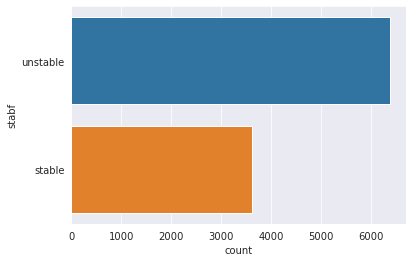

In [7]:
sns.countplot(y='stabf', data=df)


In [8]:

df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [9]:
# Encoding the target variable
# Convert stabf to an binary variable
df['stabf'] = pd.get_dummies( df.stabf ).stable


In [10]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [11]:
# no missing values
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [12]:
# droping the stab colunms due to it correlation with the target 
df = df.drop(columns= 'stab')


In [13]:
# verifying the colunms
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

# splitting the dataset

y = df.stabf
X = df.drop(columns='stabf')



In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,random_state=1)
 


In [19]:
# require algorithms
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score



In [22]:
# Create pipelines dictionary
# to standardize the training set and fit the model using the require algorithms

pipelines = {
    'et' : make_pipeline(StandardScaler(), ExtraTreesClassifier(random_state=1)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))
}

# Add a pipeline for XGBClassifier, LGBMClassifier, LogisticRegression
pipelines['xgb'] = make_pipeline(StandardScaler(), XGBClassifier(random_state=1))

pipelines['lgb'] = make_pipeline(StandardScaler(), LGBMClassifier(random_state=1))
pipelines['lg'] = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

# hyperparameters values

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,

'min_samples_leaf': min_samples_leaf,

'min_samples_split': min_samples_split,

'max_features': max_features}


rs = RandomizedSearchCV(ExtraTreesClassifier(), param_distributions=hyperparameter_grid,
                        n_iter=10,scoring = 'accuracy', random_state=1,
                        n_jobs=-1, cv=5,verbose=1)

# adding randomizedSearch to pipeline
pipelines['rs'] = make_pipeline(StandardScaler(), rs)



In [76]:
 fitted_models = {}
# helper function to fit and train the model
def fit_and_train_models():
    """
        The function fit and train all the algorithims in 
        the pipeline object and save them in a dictionary
        Also displaying status of the model  that has been fitted
    """
    
    # Create empty dictionary called fitted_models
   

    # Loop through model pipelines
    #tuning each one and saving it to fitted_models
    
    for name, pipeline in pipelines.items():
    
    
        # Fit model on X_train, y_train
        pipeline.fit(x_train, y_train)
    
        # Store model in fitted_models[name] 
        fitted_models[name] = pipeline
    
        # Print '{name} has been fitted'
        print(name, 'has been fitted.')
        
    
        

In [77]:
# fitting and training the model and returning the model fitted
fit_and_train_models()

et has been fitted.
rf has been fitted.
[01:22:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb has been fitted.
lgb has been fitted.
lg has been fitted.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
rs has been fitted.
ext has been fitted.


In [50]:
def accuracy_score_for_all_models():
    """
        This evaluate t of all the 
        model in the pipeline on the test set using accuracy_score metrics
    """
    for name, pipeline in fitted_models.items():
        print(name, pipeline.score(x_test, y_test))

In [52]:
# evaluating model using accuracy
accuracy_score_for_all_models()

et 0.9285
rf 0.9295
xgb 0.9455
lgb 0.9395
lg 0.804
rs 0.9265


In [61]:
# optimal hyperameters for the extratrees gotten from the randomizedSearchCV
rs.best_params_
#fitted_models['rs'].best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [62]:
rs.best_estimator_

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000)

In [64]:
# using the optimal hyparameters to tune the extratrees classifier
ext = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=None,random_state=1)


In [69]:
# calculating the feature importance of the optimal extratreesClassifier
feature_importance = ext.feature_importances_
  

In [70]:
feature_importance

array([0.13723975, 0.1405075 , 0.13468029, 0.13541676, 0.00368342,
       0.00533686, 0.00542927, 0.00496249, 0.10256244, 0.10757765,
       0.11306268, 0.10954089])

In [71]:
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        ext.estimators_],
                                        axis = 0)

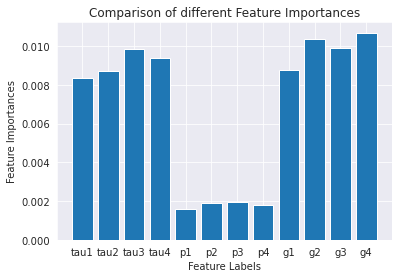

In [72]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [ ]:
# checking feature imprtance
# g3 is the most mportant and p4 is the least important

In [73]:
pipelines['ext'] = make_pipeline(StandardScaler(), ext)

In [74]:
etr = pipelines['ext'].fit(x_train,y_train)

In [67]:
pred_1 = etr.predict(x_test)

In [68]:
accuracy_score(y_test,pred_1)

0.927

 the accuracy score reduce using the optimal parameter

### More valuation metrics 

In [75]:
# Display best_score_ for each fitted model
pred = {}
for name, pipeline in fitted_models.items():
    
   
    
    pred[name] =  pipeline.predict(x_test)
    print('Evaluation Metrics for:', name)
    print(confusion_matrix(y_test,pred[name]))
    print(accuracy_score(y_test,pred[name]))
    print(classification_report(y_test,pred[name]))
    
    
    
    


Evaluation Metrics for: et
[[1257   31]
 [ 112  600]]
0.9285
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1288
           1       0.95      0.84      0.89       712

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Evaluation Metrics for: rf
[[1238   50]
 [  91  621]]
0.9295
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1288
           1       0.93      0.87      0.90       712

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Evaluation Metrics for: xgb
[[1243   45]
 [  64  648]]
0.9455
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1288
           1       0.94      0.91      0.92       712

In [82]:
fitted_models['et'].best_estimator_

AttributeError: 'Pipeline' object has no attribute 'best_estimator_'